# Analyzing and Comparing EMLO Collections

The EMLO project contains dozens of correspondence collections centered around different historical figures. Each collection is maintained either by a single institute, or is a merging of smaller collections maintained across multiple institutions. 

The metadata of the correspondences has been mapped to a single schema.

Making a comparison of different sets of correspondences, at different scales, draws the focus on different aspects of comparison. At the same time, it brings to the surface some differences in how the digital collections were shaped by selection criteria.

At a small scale, it is easy to see for instance that a collection around a historical figure, e.g. Samuel Hartlib or Françoise de Graffigny has not only letters authored by or addressed to that figure, but also some letters between the correspondents in their networks. When working with many correspondence collections with thousands or tens of thousands of letters, this is a detail that is easily lost in overviews of metadata records and most summary statistics.


In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt



number of distinct authors: 14619
number of distinct addressees: 7649


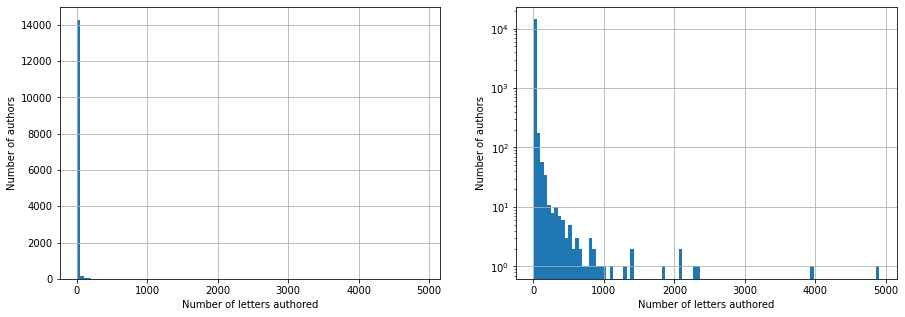

In [2]:
# Adjust the default size for figures so that placing two plots 
# next to each other in a sub plot are still big enough.
plt.rcParams['figure.figsize'] = [15, 5]

# read the merged letters file into a Pandas dataframe
merged_letters_file = '../data/emlo_letters.csv'
df = pd.read_csv(merged_letters_file, sep='\t')

# show the nnnumber of authors and addressees
print('number of distinct authors:', df['author'].nunique())
print('number of distinct addressees:', df['addressee'].nunique())

# create a plot canvas with two adjacent subplots
plt.subplot(1,2,1)
# Distribution of number of letters per author
# Sub-plot 1 shows the number of letters by each letter author on normal scaled axes
df['author'].value_counts().hist(bins=100)
plt.ylabel('Number of authors')
plt.xlabel('Number of letters authored')

plt.subplot(1,2,2)
# Sub-plot 1 shows the number of letters by each letter author on a log scaled y-axis
df['author'].value_counts().hist(bins=100)
plt.ylabel('Number of authors')
plt.xlabel('Number of letters authored')
plt.yscale('log')

plt.show()


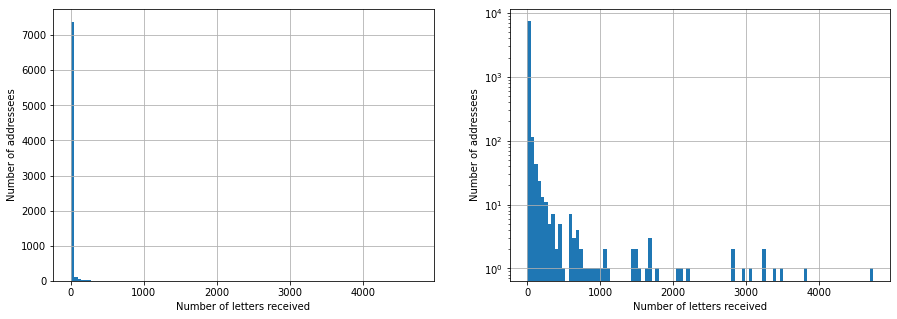

In [4]:
plt.subplot(1,2,1)
# Number of letters by each letter addressee
df['addressee'].value_counts().hist(bins=100)
plt.xlabel('Number of letters received')
plt.ylabel('Number of addressees')


# Distribution of number of letters per addressee
plt.subplot(1,2,2)
df['addressee'].value_counts().hist(bins=100)
plt.ylabel('Number of addressees')
plt.xlabel('Number of letters received')
plt.yscale('log')
plt.show()



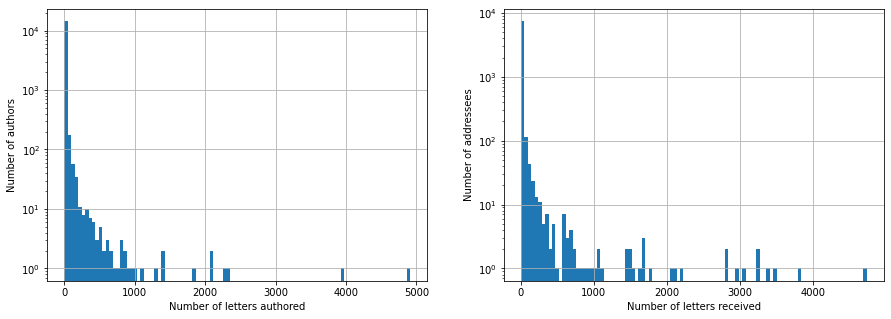

In [5]:
plt.subplot(1,2,1)
# Number of letters by each letter addressee
df['author'].value_counts().hist(bins=100)
plt.ylabel('Number of authors')
plt.xlabel('Number of letters authored')
plt.yscale('log')


# Distribution of number of letters per addressee
plt.subplot(1,2,2)
df['addressee'].value_counts().hist(bins=100)
plt.ylabel('Number of addressees')
plt.xlabel('Number of letters received')
plt.yscale('log')
plt.show()



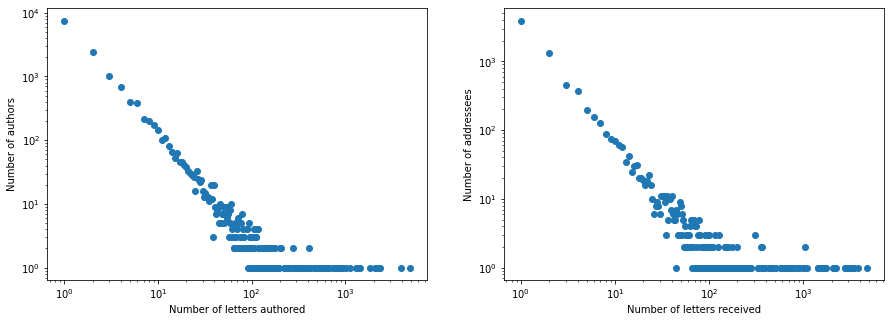

In [19]:
from collections import Counter

author_dist = Counter([count for count in df['author'].value_counts()])
x_author, y_author = zip(*author_dist.items())
plt.subplot(1,2,1)
plt.scatter(x_author, y_author)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of letters authored')
plt.ylabel('Number of authors')

plt.subplot(1,2,2)
addressee_dist = Counter([count for count in df['addressee'].value_counts()])
x_addressee, y_addressee = zip(*addressee_dist.items())
plt.scatter(x_addressee, y_addressee)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of letters received')
plt.ylabel('Number of addressees')
plt.show()


The plots show typical skewed distributions. The vast majority of correspondents author and/or receive only one or a few letters (the hight bar on the left of each figure represents all authors/addressees authoring or receiving only one letter). Only a handful of people author or receive more than a thousand letters. 

Who are the most prolific authors?

In [6]:
df['author'].value_counts().head(20)

Groot, Hugo de, 1583-1645                      4912
Huygens, Constantijn, 1596-1687                3951
Plantin, Christophe, 1520-1589                 2331
Vossius, Gerardus Joannes, 1577-1649           2292
Peiresc, Nicolas-Claude Fabri de, 1580-1637    2111
Oldenburg, Henry, 1619-1677                    2092
Scaliger, Joseph Justus, 1540-1609             1847
Huygens, Christiaan, 1629-1695                 1423
Hearne, Thomas, 1678-1735                      1382
Wallis, John (Dr), 1616-1703                   1290
Smith, Thomas (Dr), 1638-1710                  1114
Dury, John, 1596-1680                          1003
Bayle, Pierre, 1647-1706                        938
Bourignon, Antoinette, 1616-1680                887
Montagu, Mary Wortley (Lady), 1689-1762         860
Aubrey, John, 1626-1697                         854
Heinsius, Nicolaas, 1620-1681                   833
Descartes, René, 1596-1650                      796
Vossius, Isaac (Dr), 1618-1689                  793
Brett, Thoma

In the list above, most of the authors are the central figure or eponym of one of the EMLO collections.

Exceptions are:

- John Dury (1596-1650): Preacher and ecumenist
- August II of Braunschweig-Wolfenbüttel (1579-1666): Duke (Herzog) of Braunschweig-Wolfenbüttel

These are prolific authors in collections centred on someone else. 

We first look at the letters of August II. Which collections are they part of?

In [7]:
print("Collections with August II of Braunschweig-Wolfenbüttel's letters:")
df[df['author'] == 'August II of Braunschweig-Wolfenbüttel, 1579-1666']['collection'].value_counts()



Collections with August II of Braunschweig-Wolfenbüttel's letters:


Andreae, Johann Valentin                        582
Kircher, Athanasius                              21
Bodleian card catalogue                           1
Braunschweig-Wolfenbüttel, Sophia Hedwig von      1
Name: collection, dtype: int64

Next, we look at who these letters are addressed to:

In [8]:
print("Addressees of August II of Braunschweig-Wolfenbüttel's letters:")
df[df['author'] == 'August II of Braunschweig-Wolfenbüttel, 1579-1666']['addressee'].value_counts()



Addressees of August II of Braunschweig-Wolfenbüttel's letters:


Andreae, Johann Valentin, 1586-1654                        581
Kircher, Athanasius, 1601-1680                              21
Württemberg, Eberhard III von, 1614-1674                     1
Braunschweig-Lüneburg, Georg, 1582-1641                     1
Braunschweig-Wolfenbüttel, Sophia Hedwig von, 1592-1642      1
Name: addressee, dtype: int64

These two queries reveal a typical pattern in these collections. August II has 582 letters in the collection of Johann Valentin Andreae, of which 581 are also addressed to Andreae. Letters in a collection around a certain person tend be either authored or addressed to this person, which makes sense from a recordkeeping perspective. But there is one letter addressed to someone else, i.e. Eberhard III von Württemberg.

Now, let us look at the same queries for John Dury's letters:

In [9]:
print("Collections with John Dury's letters:")
df[df['author'] == 'Dury, John, 1596-1680']['collection'].value_counts()



Collections with John Dury's letters:


Hartlib, Samuel                837
Bodleian card catalogue        149
Ussher, James                    6
Mede, Joseph                     3
Huygens, Constantijn             2
Culpeper, Cheney                 2
Boyle, Robert                    2
Vossius, Gerardus Joannes        1
Bisterfeld, Johann Heinrich      1
Name: collection, dtype: int64

John Dury has letters in eight different collections, but in seven of those, it is only a handful of letters. We can also see who he addressed those letters to:

In [10]:
print("Addressees of John Dury's letters:")
df[df['author'] == 'Dury, John, 1596-1680']['addressee'].value_counts()



Addressees of John Dury's letters:


Hartlib, Samuel, 1600-1662                      528
Roe, Thomas (Sir), 1581-1644                     31
Culpeper, Cheney, 1601-1663                      11
Borthwick, Eleazar, fl. 1633-1642                 7
St Amand, Joseph, fl. 1636-1643                   7
                                               ... 
House of Commons (1641-1712)                      1
St Gallen and Appenzell, Clergy in, fl. 1654      1
Cecil, Elizabeth, fl. 1640                        1
Coysh, Joseph, fl. 1652                           1
Rusdorf, Johann Joachim von, 1589-1640            1
Name: addressee, Length: 135, dtype: int64

Now we see a differennt pattern. Samuel Hartlib is by far the most frequent addressee of John Dury's letters in these collections. But looking at the two sets of counts above, we note that John Dury authored 837 letters in the Samuel Hartlib collections, of which only 528 are addressed to Samuel Hartlib. Who are the other 309 letters in the Samuel Hartlib collection addressed to? 

In [11]:
print("Addressees of John Dury's letters in the Samuel Hartlib:")
df[(df['author'] == 'Dury, John, 1596-1680') & (df['collection'] == 'Hartlib, Samuel')]['addressee'].value_counts()


Addressees of John Dury's letters in the Samuel Hartlib:


Hartlib, Samuel, 1600-1662           528
Roe, Thomas (Sir), 1581-1644          30
Culpeper, Cheney, 1601-1663            9
Waller, William (Sir), 1598-1668       7
Borthwick, Eleazar, fl. 1633-1642      7
                                    ... 
Ames, William, 1576-1633               1
Ancelin, fl. 1660                      1
Bedell, William, 1572-1642             1
Figulus, Petr, 1619-1670               1
Palmer, Herbert, 1601-1647             1
Name: addressee, Length: 127, dtype: int64

Apparently, some collections also contains hundreds of letters that are not authored by or addressed to the collection eponym.


### Analyzing the Addressees

In [12]:
df['addressee'].value_counts().head(20)

Huygens, Constantijn, 1596-1687           4737
Hearne, Thomas, 1678-1735                 3795
Vossius, Gerardus Joannes, 1577-1649      3498
Hartlib, Samuel, 1600-1662                3388
Groot, Hugo de, 1583-1645                 3233
Lhwyd, Edward, 1659-1709                  3226
Charlett, Arthur (Reverend), 1655-1722    3066
Andreae, Johann Valentin, 1586-1654       2953
Noble, Mark (Reverend), 1754-1827         2809
Sancroft, William, 1617-1693              2797
Kircher, Athanasius, 1601-1680            2209
Oldenburg, Henry, 1619-1677               2127
D'Orville, Jacques Philippe, 1696-1751    2066
Brett, Thomas, 1667-1744                  1767
Lister, Martin, 1639-1712                 1704
Vossius, Isaac (Dr), 1618-1689            1690
Solms-Braunfels, Amalia von, 1602-1675    1660
Smith, Thomas (Dr), 1638-1710             1637
Wood, Anthony, 1632-1695                  1547
Scaliger, Joseph Justus, 1540-1609        1512
Name: addressee, dtype: int64

In the list above, most of the addressees are the central figure or eponym of one of the EMLO collections.

Exceptions are:

- Nicolaas Reigersberch (1584-1654): brother-in-law of Hugo de Groot; Jurist
- Willem de Groot (1597-1662): brother of Hugo de Groot (1583-1645); Dutch jurist

These are prolific authors in collections centred on someone else. 

In [13]:
print("Collections with letters to Nicolaas Reigersberch:")
df[df['addressee'] == 'Reigersberch, Nicolaas, 1584-1654']['collection'].value_counts()



Collections with letters to Nicolaas Reigersberch:


Groot, Hugo de               881
Vossius, Gerardus Joannes      8
Bodleian card catalogue        6
Name: collection, dtype: int64

In [14]:
print("Authors of letters to Nicolaas Reigersberch:")
df[df['addressee'] == 'Reigersberch, Nicolaas, 1584-1654']['author'].value_counts()



Authors of letters to Nicolaas Reigersberch:


Groot, Hugo de, 1583-1645               862
Reigersberch, Maria, 1589-1653           18
Vossius, Gerardus Joannes, 1577-1649     14
Groot, Willem de, 1597-1662               1
Name: author, dtype: int64

In [15]:
print("Collections with letters to Willem de Groot:")
df[df['addressee'] == 'Groot, Willem de, 1597-1662']['collection'].value_counts()



Collections with letters to Willem de Groot:


Groot, Hugo de               732
Vossius, Gerardus Joannes      3
Bodleian card catalogue        1
Name: collection, dtype: int64

In [16]:
print("Authors of letters to Willem de Groot:")
df[df['addressee'] == 'Groot, Willem de, 1597-1662']['author'].value_counts()



Authors of letters to Willem de Groot:


Groot, Hugo de, 1583-1645                     726
Vossius, Gerardus Joannes, 1577-1649            4
Groot, Johan Hugo de, 1554-1640                 4
Groot van Kraayenburg, Dirck de, 1618-1661      2
Name: author, dtype: int64

Again, we see some letters between persons who are not the central figure in any of the EMLO collections. 

How many letters in each collection do not involve the eponym as either author or addressee?

First, we map the name of the collection to the name as used as author or addressee:

In [17]:
eponyms = list(df['collection'].unique())
authors = list(df['author'].unique())
author_counts = df['author'].value_counts()
authors

best_map = {}
eponym_map = {}
for eponym in eponyms:
    #print(eponym)
    for author in authors:
        if not isinstance(author, str) or ';' in author:
            continue
        if eponym == 'Fermat, Pierre de' and author == 'Fermat, Pierre, 1601-1665':
            eponym_map[eponym] = author
        if eponym == 'Comenius, Jan Amos' and author == 'Komenský, Jan Amos, 1592-1670':
            eponym_map[eponym] = author
        if eponym in author[:len(eponym)]:
            if eponym not in best_map or author_counts[author] > best_map[eponym]:
                best_map[eponym] = author_counts[author]
                eponym_map[eponym] = author
    if eponym not in eponym_map:
        print(eponym)

Bodleian card catalogue


In [18]:
print("Collection:\t\t\t\t\t\tAll letters\tNon-eponym letters")
print("----------------------------------------------------------------------------------------")
for eponym in eponym_map:
    epo_df = df[df['collection'] == eponym]
    #print(eponym, '\t', eponym_map[eponym])
    non_epo_df = df[(df['collection'] == eponym) & (df['author'] != eponym_map[eponym]) & (df['addressee'] != eponym_map[eponym])]
    perc = non_epo_df.shape[0] / epo_df.shape[0]
    print(f"{eponym: <50}\t{epo_df.shape[0]}\t\t{non_epo_df.shape[0]}\t({perc:.2f})")


Collection:						All letters	Non-eponym letters
----------------------------------------------------------------------------------------
Bayle, Pierre                                     	1791		133	(0.07)
Sirleto, Guglielmo                                	1438		15	(0.01)
Seidenbecher, Georg Lorenz                        	47		0	(0.00)
Swammerdam, Jan                                   	172		4	(0.02)
Fermat, Pierre de                                 	121		6	(0.05)
Ortelius, Abraham                                 	467		0	(0.00)
Reneri, Henricus                                  	61		0	(0.00)
Spinoza, Baruch                                   	58		1	(0.02)
Lister, Martin                                    	1212		2	(0.00)
Wallis, John                                      	1998		232	(0.12)
Ussher, James                                     	681		17	(0.02)
Groot, Hugo de                                    	8034		280	(0.03)
Franckenberg, Abraham von                         	85		1	(0.01)
Bourignon

Most collection have almost exclusively letters involving the eponym, but some collections are very different. In the Peter Paul Rubens collection, the majority (59%) of letters are between other people than Rubens. 

In [19]:
df[df['collection'] == 'Rubens, Peter Paul'][['collection','author','addressee']].head(10)

,collection,author,addressee
131088,"Rubens, Peter Paul","Moretus, Balthasar, 1574-1641","Rubens, Philip, 1574-1611"
131089,"Rubens, Peter Paul","Rubens, Philip, 1574-1611","Rubens, Peter Paul, 1577-1640"
131090,"Rubens, Peter Paul","Albert VII, Archduke of Austria, 1559-1621","Richardot, Jean, 1570-1614"
131091,"Rubens, Peter Paul","Gonzaga, Vincenzo I, 1562-1612","Damasceni Peretti, Alessandro, 1571-1623"
131092,"Rubens, Peter Paul","Damasceni Peretti, Alessandro, 1571-1623","Gonzaga, Vincenzo I, 1562-1612"
131093,"Rubens, Peter Paul","Arrigoni, Lelio, b.1541","Chieppio, Annibal, 1563-1623"
131094,"Rubens, Peter Paul","Rubens, Philip, 1574-1611","Rubens, Peter Paul, 1577-1640"
131095,"Rubens, Peter Paul","Arrigoni, Lelio, b.1541","Chieppio, Annibal, 1563-1623"
131096,"Rubens, Peter Paul","Richardot, Jean, 1570-1614","Gonzaga, Vincenzo I, 1562-1612"
131097,"Rubens, Peter Paul","Arrigoni, Lelio, b.1541","Chieppio, Annibal, 1563-1623"


## Normalizing and scale

At a small scale, there is no need to normalize data, as the researcher can do that mentally while working with the materials.

At an intermediate scale of hundreds or thousands of documents, the variations in names of persons and places, ways in which dates are recorded are becoming a hurdle to analysis. For topical analysis, this is also an issue, as many connections between documents are hard to bring to the surface because of morphological and spelling variations. 

At a large scale with hundreds of thousands or millions of documents, the textual variations become less of a hurdle, as there is enough data to identify and map variants. 

At a very large scale with tens or hundreds of millions of documents, the textual variations become meaningful and allow measuring contextual nuance in how word variants are used to convey different aspects.

author                                       addressee                                      
Albert VII, Archduke of Austria, 1559-1621   Gonzaga, Vincenzo I, 1562-1612                      1
Rubens, Peter Paul, 1577-1640                Vosbergen, Josias van, 1593-1628                    1
Mello, Francisco Manuel de, 1608-1666        Chambre des Comptes (Spanish Netherlands)           1
Mennes, John (Sir), 1599-1671                Admiralty Court, England                            1
Moncada, Francisco, 1586-1635                Philip IV, King of Spain, 1605-1665                 1
                                                                                                ..
Rubens, Peter Paul, 1577-1640                Fabri, Palamède, 1582-1645                         18
                                             Olivares, Gaspar de Guzmán, Conde de, 1587-1645    25
Ferdinand, archiduc d'Autriche, 1609-1641    Philip IV, King of Spain, 1605-1665                36
Rubens, Peter Pa

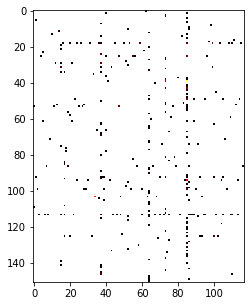

In [24]:
df_rubens = df[df.collection == 'Rubens, Peter Paul']

df_rubens[['collection','author','addressee']].head(10)

g = df_rubens.groupby(['author', 'addressee']).size()

u = g.unstack('author')

plt.imshow(u, cmap='hot', interpolation='nearest')

g.sort_values()


## Connections between collections

How many connections are there between collections? This is easy with two collections, but becomes more difficult when there are many collections.

Which persons appear in multiple collections?

In [54]:
# which authors occur in multiple collections
df[(df[['collection', 'author']].duplicated(keep='first') == False)]['author'].value_counts()


Unknown                                                                                                                                                     37
Oldenburg, Henry, 1619-1677                                                                                                                                 16
Huygens, Constantijn, 1596-1687                                                                                                                             14
Mersenne, Marin, 1588-1648                                                                                                                                  13
Gronovius, Johann Frederick, 1611-1671                                                                                                                      12
Groot, Hugo de, 1583-1645                                                                                                                                   11
Leibniz, Gottfried Wilhelm, 1646-1716         

In [56]:
df[df['author'] == 'Oldenburg, Henry, 1619-1677']['collection'].value_counts()

Oldenburg, Henry                      1524
Wallis, John                           142
Boyle, Robert                          107
Huygens, Christiaan                    105
Lister, Martin                          61
Hartlib, Samuel                         46
Newton, Isaac                           16
Swammerdam, Jan                          8
Milton, John                             7
Sachs von Löwenheim, Philipp Jakob       5
Vossius, Isaac                           4
Hobbes, Thomas                           2
Ashmole, Elias                           1
Comenius, Jan Amos                       1
Vossius, Gerardus Joannes                1
Coccejus, Johannes                       1
Name: collection, dtype: int64

Samuel Hartlib is in the top 20 of addressees but not in the top 20 of authors:

In [105]:
print('Samuel Hartlib\n')
print(f'\tnumber of letters sent:', df[df['author'] == 'Hartlib, Samuel, 1600-1662'].shape[0])
print(f'\tnumber of letters received:', (df[df['addressee'] == 'Hartlib, Samuel, 1600-1662'].shape[0]))


Samuel Hartlib

	number of letters sent: 401
	number of letters received: 3388


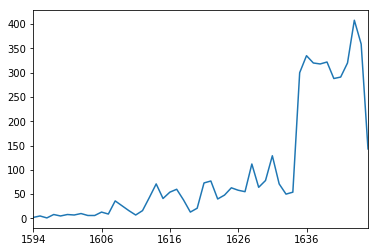

In [108]:
# Number of letters authored by Hugo de Groot per year
hugo = 'Groot, Hugo de, 1583-1645'

df['year'] = df['date'].str.extract('(\d\d\d\d)', expand=False)

df_hugo = df[df['author'] == hugo]

df_hugo['year'].value_counts().sort_index().plot()

plt.show()


In [110]:
df_hugo['addressee'].value_counts()

Reigersberch, Nicolaas, 1584-1654                                862
Groot, Willem de, 1597-1662                                      726
Oxenstierna, Axel (Count), 1583-1654                             587
Camerarius, Ludwig, 1573-1651                                    347
Vossius, Gerardus Joannes, 1577-1649                             339
Marin, Charles, d.1651                                           122
Oxenstierna, Johan Axelsson, 1611-1657                           109
Salvius, Johan Adler, 1590-1652                                  106
Wicquefort, Joachim van, 1600-1670                                99
Heinsius, Daniel, 1580-1655                                       89
Aubery du Maurier, Benjamin, 1566-1636                            85
Appelboom, Harald Andersson, 1612-1674                            83
Christina, Queen of Sweden, 1626-1689                             77
Schmalz, Peter Abel, fl. 1635-1638                                61
Uyttenbogaert, Johannes (Dr), 1557

Some collections include letters between correspondents of the collection creator, while others only contains letters where the collection creator is the author or addressee of the letter. 

E.g. the collection of correspondence of Hugo de Groot includes letters between his brother and his brother-in-law.



In [122]:
df_christiaan = df[(df['author'] == 'Huygens, Christiaan, 1629-1695') | (df['addressee'] == 'Huygens, Christiaan, 1629-1695')]

df_christiaan = df[df['collection'] == 'Huygens, Christiaan']
df_christiaan['author'].value_counts()


Huygens, Christiaan, 1629-1695                         1345
Huygens, Constantijn, 1628-1697                         175
Oldenburg, Henry, 1619-1677                             105
Huygens, Constantijn, 1596-1687                          75
Sluse, René François de, 1622-1685                       72
Chapelain, Jean, 1595-1674                               70
Moray, Robert (Sir), 1608-1673                           68
Schooten, Frans van, 1615-1660                           58
Boulliau, Ismaël, 1605-1694                              54
Leibniz, Gottfried Wilhelm, 1646-1716                    42
Bruno, Henrick, 1617-1664                                40
Huygens, Susanna, 1637-1725                              32
Heinsius, Nicolaas, 1620-1681                            28
Petit, Pierre, 1598 or before-1677                       24
Medici, Leopoldo de', 1617-1675                          24
Doublet, Philips, 1633-1707                              23
Hudde, Johannes, 1628-1704              

In [124]:
df_constantijn = df[df['collection'] == 'Huygens, Constantijn']
df_constantijn['addressee'].value_counts()


Huygens, Constantijn, 1596-1687                                          4252
Solms-Braunfels, Amalia von, 1602-1675                                    768
Huygens, Christiaan, 1551-1624                                             94
Barlaeus, Caspar, 1584-1648                                                81
Sauzin, Jean                                                               68
Heinsius, Daniel, 1580-1655                                                63
Lionne, Hugues de, 1611-1671                                               44
Rivet, André, 1572-1651                                                    44
Hooft, Pieter Cornelius, 1581-1647                                         40
William III and II, King of England, Scotland, and Ireland, 1650-1702      39
Beringhen, Henri, 1603-1692                                                33
Chièze, Sebastien, 1625-1679                                               29
Unknown                                                         

In [12]:
df['author_freq'] = df.groupby(['author'])['id'].transform('count')
df['addressee_freq'] = df.groupby(['addressee'])['id'].transform('count')
df['correspondents_freq'] = df.author_freq + df.addressee_freq

In [16]:
df.groupby(['id', 'author', 'addressee']).size()

correspondents_freq  author                                addressee                                  
2.0                  A., H.                                Unidentified male recipients (group) (n.d.)      1
                     Adriano, Hippolito, fl. 1579          Franchi, Curzio de, d.1591                       1
                     Agard, K., fl. 1703                   Barnes (Mrs), fl. 1700-1716                      1
                     Airay, John, fl. 1671-1678            Mackell, Thomas, fl. 1678                        1
                     Alford [?], fl. 1667-1669             Joyce (?), Giles (fl. 1667 or 1669)              1
                                                                                                         ... 
6829.0               Oldenburg, Henry, 1619-1677           Huygens, Constantijn, 1596-1687                  9
7029.0               Vossius, Gerardus Joannes, 1577-1649  Huygens, Constantijn, 1596-1687                 13
7184.0           

In [97]:
ids = list(df.sort_values('correspondents_freq').id)
auths = list(df.sort_values('correspondents_freq').author)
addrs = list(df.sort_values('correspondents_freq').addressee)
auth_freqs = list(df.sort_values('correspondents_freq').author_freq)
addr_freqs = list(df.sort_values('correspondents_freq').addressee_freq)

auths = [auth if isinstance(auth, str) else None for auth in auths]
addrs = [addr if isinstance(addr, str) else None for addr in addrs]


In [98]:
corrs = [{'id': id, 'auth': auth, 'addr': addr, 'author_freq': auth_freq, 'addr_freq': addr_freq} for id, auth, addr, auth_freq, addr_freq in zip(ids, auths, addrs, auth_freqs, addr_freqs)]

corrs[0]

{'addr': 'Jones, Robert (Reverend), fl. 1698',
 'addr_freq': 1.0,
 'auth': 'Meare, John, 1649-1710',
 'author_freq': 1.0,
 'id': 'aabeebf7-4c5b-4bc2-a2ec-8ace326cfa7a'}

In [104]:
from collections import OrderedDict
queued = {}
fetch = OrderedDict()
seen = {}
for corr in corrs:
    if corr['auth'] not in queued and corr['addr'] not in queued:
        queued[corr['auth']] = corr['id']
        queued[corr['addr']] = corr['id']
        fetch[corr['id']] = corr

print(len(fetch.keys()))
print(len(queued.keys()))


1942
3873


In [105]:
for corr in corrs:
    if corr['auth'] not in queued:
        queued[corr['auth']] = corr['id']
        fetch[corr['id']] = corr
    elif corr['auth'] not in queued:
        queued[corr['auth']] = corr['id']
        fetch[corr['id']] = corr

print(len(fetch.keys()))
print(len(queued.keys()))


13827
15758


In [101]:
for corr_id in fetch:
    url = f'http://emlo.bodleian.ox.ac.uk/profile/work/{corr_id}'
    print(url)
    break

http://emlo.bodleian.ox.ac.uk/profile/work/aabeebf7-4c5b-4bc2-a2ec-8ace326cfa7a


In [62]:
import requests
from bs4 import BeautifulSoup as bsoup

df[df.id == 'aabeebf7-4c5b-4bc2-a2ec-8ace326cfa7a']

#response = requests.get(url)

,Unnamed: 0,id,type,collection,date,author,addressee,origin,destination,repository,addressee_freq,author_freq,correspondents_freq
73349,17320,aabeebf7-4c5b-4bc2-a2ec-8ace326cfa7a,Letter,Bodleian card catalogue,30 August 1698,"Meare, John, 1649-1710","Jones, Robert (Reverend), fl. 1698","Oxfordshire, England",NaN,"Bodleian Library, University of Oxford: MS Bal...",1.0,1.0,2.0


In [83]:
def get_relation_info(rel_type, detail_soup):
    rel_type_soup = detail_soup.find_all(class_=rel_type)
    if len(rel_type_soup) == 0:
        return None
    relation_soup = rel_type_soup[0].find_all(class_='relations')[0]
    return {
        'relation_type': rel_type.split(' '),
        'relation_text': [string for string in relation_soup.stripped_strings]
    }

def get_provenance(page_soup):
    prov_soup = page_soup.find_all(class_='provenance')[0]
    prov = prov_soup.text
    return prov.replace('Source of data: ','')

def get_page_details(corr_id, page_soup):
    detail_soup = page_soup.find(id='details')
    rel_types = ['people authors', 'people recipients', 'locations origin', 'locations destination']
    relation_info = [get_relation_info(rel_type, detail_soup) for rel_type in rel_types]
    return {
        'correspondence_id': corr_id,
        'relations': [relation for relation in relation_info if relation != None],
        'provenance': get_provenance(page_soup)
    }

def get_correspondence_page(corr_id):
    url = f'http://emlo.bodleian.ox.ac.uk/profile/work/{corr_id}'
    response = requests.get(url)
    page_soup = bsoup(response.content)
    return get_page_details(corr_id, page_soup)

corr_id = 'aabeebf7-4c5b-4bc2-a2ec-8ace326cfa7a'
detail_doc = get_page_details(corr_id, page_soup)
detail_index = 'emlo_page_details'
from elasticsearch import Elasticsearch

es = Elasticsearch()

es.index(index=detail_index, doc_type='page_detail', id=detail_doc['correspondence_id'], body=detail_doc)


{'_id': 'aabeebf7-4c5b-4bc2-a2ec-8ace326cfa7a',
 '_index': 'emlo_page_details',
 '_primary_term': 1,
 '_seq_no': 1,
 '_shards': {'failed': 0, 'successful': 1, 'total': 2},
 '_type': 'page_detail',
 '_version': 2,
 'result': 'updated'}

In [106]:
import time

headers = {
    'user-agent': 'DataScopesAnalyzer (https://marijnkoolen.github.io/Data-Scopes-Developers-2018/)',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Language': 'en-gb',
}

fetch[corr_id]
#time.sleep(10)

{'addr': 'Castleton, William, fl. 1642',
 'addr_freq': 1.0,
 'auth': 'Barnardiston, Nathaniel (Sir), 1588-1653',
 'author_freq': 1.0,
 'id': 'a970efa6-d3e4-450f-811c-ca186001e214'}

In [107]:
from elasticsearch import exceptions

skip = 0

for ci, corr_id in enumerate(fetch):
    if es.exists(index=detail_index, id=corr_id):
        #print('skip', corr_id)
        skip += 1
        if skip % 100 == 0:
            print('skipped', skip)
        continue
    #print('fetching page for', corr_id)
    detail_doc = get_correspondence_page(corr_id)
    try:
        detail_doc['author'] = fetch[corr_id]['auth']
        detail_doc['addressee'] = fetch[corr_id]['addr']
    except TypeError:
        print(fetch[corr_id])
        raise
    try:
        es.index(index=detail_index, doc_type='page_detail', id=detail_doc['correspondence_id'], body=detail_doc)
    except exceptions.RequestError:
        print(detail_doc)
        raise
    time.sleep(5)
    if (ci+1) % 100 == 0:
        print(ci+1, 'correspondence pages fetched')


skipped 100
skipped 200
skipped 300
skipped 400
skipped 500
skipped 600
skipped 700
skipped 800
skipped 900
skipped 1000
skipped 1100
skipped 1200
skipped 1300
skipped 1400
skipped 1500
skipped 1600
skipped 1700
skipped 1800
skipped 1900
2000 correspondence pages fetched
2100 correspondence pages fetched
2200 correspondence pages fetched
2300 correspondence pages fetched
2400 correspondence pages fetched
2500 correspondence pages fetched
2600 correspondence pages fetched
2700 correspondence pages fetched
2800 correspondence pages fetched
2900 correspondence pages fetched
3000 correspondence pages fetched
3100 correspondence pages fetched
3200 correspondence pages fetched
3300 correspondence pages fetched
3400 correspondence pages fetched
3500 correspondence pages fetched
3600 correspondence pages fetched
3700 correspondence pages fetched
3800 correspondence pages fetched
3900 correspondence pages fetched
4000 correspondence pages fetched
4100 correspondence pages fetched
4200 correspon

ConnectionError: HTTPConnectionPool(host='emlo.bodleian.ox.ac.uk', port=80): Max retries exceeded with url: /profile/work/055fd15b-1d06-49fd-9bfc-a52bb1132fcc (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x126b44518>: Failed to establish a new connection: [Errno 60] Operation timed out',))